**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [4]:
# Import the data set
df=pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


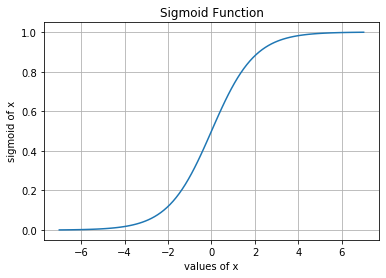

In [6]:
# Define the sigmoid function
def sigmoid_func(X):
    Y=(1/(1+np.exp(-X)))
    return Y

import matplotlib.pyplot as plt
X=np.linspace(-7,7,100)
z=sigmoid_func(X)
plt.plot(X,z)
plt.grid()
plt.xlabel('values of x')
plt.ylabel('sigmoid of x')
plt.title('Sigmoid Function')
plt.show()

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [8]:
# Create a train/test split
from sklearn.model_selection import train_test_split
X=df[['PAY_1','LIMIT_BAL']]
y=df['default payment next month']
print(X)
print(y)

       PAY_1  LIMIT_BAL
0          2      20000
1         -1     120000
2          0      90000
3          0      50000
4         -1      50000
...      ...        ...
26659      0     220000
26660     -1     150000
26661      4      30000
26662      1      80000
26663      0      50000

[26664 rows x 2 columns]
0        1
1        1
2        0
3        0
4        0
        ..
26659    0
26660    0
26661    1
26662    1
26663    1
Name: default payment next month, Length: 26664, dtype: int64


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [9]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_model=LogisticRegression(solver='liblinear')
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [14]:
# Fit the logistic regression model on training data
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Make predictions using `.predict()`
y_pred=log_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
# Find class probabilities using `.predict_proba()`
y_pred_prob=log_model.predict_proba(X_test)
y_pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [18]:
# Add column of 1s to features
np.ones((X_test.shape[0],1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [19]:
np.ones((X_test.shape[0],1)).shape

(5333, 1)

In [48]:
X_test.shape

(5333, 2)

In [46]:
ones_feat=np.hstack([np.ones((X_test.shape[0],1)),X_test])
ones_feat.shape

(5333, 3)

In [47]:
ones_feat

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

In [22]:
# Get coefficients and intercepts from trained model
log_model_coeff=log_model.coef_
log_model_intercept=log_model.intercept_
print('Coefficients:',log_model_coeff)
print('Intercepts:',log_model_intercept)

Coefficients: [[ 8.27451187e-11 -6.80876727e-06]]
Intercepts: [-6.57647457e-11]


In [31]:
coeff_interc_feats=np.concatenate([log_model_intercept.reshape(1,1),log_model_coeff],axis=1)
coeff_interc_feats.shape

(1, 3)

In [32]:
coeff_interc_feats

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

In [29]:
# Manually calculate predicted probabilities
man_pred_proba=np.dot(coeff_interc_feats,np.transpose(ones_feat))
man_pred_proba.shape

(1, 5333)

In [30]:
man_pred_proba

array([[-1.08940276, -0.34043836, -1.36175345, ..., -0.34043836,
        -1.56601647, -0.68087673]])

In [35]:
sig_man_pred_proba=sigmoid_func(man_pred_proba)
sig_man_pred_proba

array([[0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
        0.33606565]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [36]:
# Manually calculate predicted classes
pred_manual= sig_man_pred_proba >= 0.5
pred_manual.shape

(1, 5333)

In [37]:
y_pred.shape

(5333,)

In [38]:
# Compare to scikit-learn's predicted classes
np.array_equal(pred_manual,y_pred.reshape(1,-1))

True

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [39]:
from sklearn.metrics import roc_auc_score

In [41]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,y_pred_prob[:,1])

0.627207450280691

In [42]:
# Use manually calculated predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,man_pred_proba.reshape(man_pred_proba.shape[1],))

0.627207450280691